In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize, RegexpTokenizer
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from copy import deepcopy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
amazon = pd.read_csv('/content/drive/MyDrive/data_amazon.xlsx - Sheet1.csv/data_amazon.xlsx - Sheet1.csv')

In [3]:
amazon = amazon[['Title', 'Review', 'Cons_rating', 'Cloth_class']]
amazon = amazon.dropna(subset=['Cons_rating'])
amazon = amazon.fillna('')

for i in amazon.index:
  amazon['Review'][i] += amazon['Title'][i]

<ipython-input-3-042e46d7cfa3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['Review'][i] += amazon['Title'][i]


In [4]:
amazon = amazon[['Review', 'Cons_rating', 'Cloth_class']]

In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49124 entries, 0 to 49337
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Review       49124 non-null  object 
 1   Cons_rating  49124 non-null  float64
 2   Cloth_class  49124 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.5+ MB


Text(0.5, 1.0, 'Count Cons_rating')

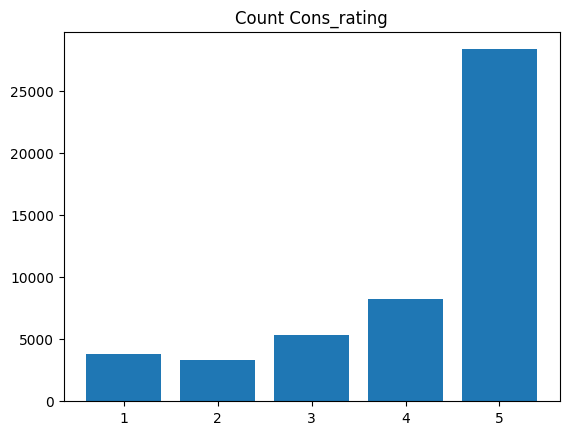

In [6]:
a = amazon.loc[amazon['Cons_rating'] == 1].count()
b = amazon.loc[amazon['Cons_rating'] == 2].count()
c = amazon.loc[amazon['Cons_rating'] == 3].count()
d = amazon.loc[amazon['Cons_rating'] == 4].count()
e = amazon.loc[amazon['Cons_rating'] == 5].count()

plt.bar([1, 2, 3, 4, 5], [a[0], b[0], c[0], d[0], e[0]])
plt.title('Count Cons_rating')

In [7]:
# tokenizing
for i in amazon.index:
  amazon['Review'][i] = word_tokenize(amazon['Review'][i].lower())

<ipython-input-7-4ab5ea20f847>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['Review'][i] = word_tokenize(amazon['Review'][i].lower())


In [8]:
stopword = set(stopwords.words('english'))

In [9]:
# stopword + clothes + nums
stopword = stopword.union({'1', '2', '3', '4', '5', '6', '7', '8', '9', '0'}).union({' ',
 'blazer',
 'blouses',
 'casual bottoms',
 'bottom',
 'chemises',
 'dress',
 'dresses',
 'fine gauge',
 'intimates',
 'intimate',
 'jackets',
 'jacket',
 'jeans',
 'jean',
 'knits',
 'layering',
 'legwear',
 'lounge',
 'outerwear',
 'pants',
 'shirts',
 'shirt',
 'shorts',
 'skirts',
 'sleep',
 'suits',
 'suit',
 'sweaters',
 'swim',
 'trend',
 'bc',
 'sooo'
 })

In [10]:
# drop stopwords
r = re.compile("n[']t|[a-z]")
for i in amazon.index:
  tmp = []
  for j in range(len(amazon['Review'][i])):
      s = ''.join(r.findall(amazon['Review'][i][j]))
      if s and (s not in stopword):
        tmp.append(s)
  amazon['Review'][i] = deepcopy(tmp)

<ipython-input-10-b477a44b0e9f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['Review'][i] = deepcopy(tmp)


In [158]:
amazon.loc[amazon['Cons_rating'] == 1]

,Review,Cons_rating,Cloth_class
61,"[tags, sewn, small, long, huge, x, itchy, cut,...",1.0,Intimates
85,"[really, hoping, like, look, way, model, least...",1.0,Knits
94,"[usually, wear, medium, bought, small, fit, ok...",1.0,Blouses
95,"[excited, order, top, red, xs, cute, huge, sha...",1.0,Knits
107,"[thin, poor, quality, especially, price, felt,...",1.0,Knits
...,...,...,...
49284,"[item, arrived, plastic, bag, took, bag, soaki...",1.0,Dresses
49291,"[n't, care, material, chose, something, elsech...",1.0,Dresses
49306,"[cheaply, made, stitching, literally, coming, ...",1.0,Dresses
49311,"[gorgeous, measurements, accurate, check, size...",1.0,Dresses


In [11]:
porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [47]:
# stemming, lemmatizing
# stem_amazon = [[] for _ in range(len(amazon['Review']))]
# lem_amazon = [[] for _ in range(len(amazon['Review']))]
# tmp = 0
# for i in amazon.index:
#   for j in range(len(amazon['Review'][i])):
#       stem_amazon[tmp].append(porter_stemmer.stem(amazon['Review'][i][j]))
#       lem_amazon[tmp].append(lemmatizer.lemmatize(amazon['Review'][i][j]))
#   tmp += 1

In [53]:
stem_amazon = [[] for _ in range(len(amazon['Review']))]
c = list(amazon['Cons_rating'].values)
tmp = 0

for i in amazon.index:
  for j in range(len(amazon['Review'][i])):
      stem_amazon[tmp].append(porter_stemmer.stem(amazon['Review'][i][j]))
  if amazon['Cons_rating'][i] <= 4.0:
    stem_amazon.append(deepcopy(stem_amazon[tmp]))
    c.append(amazon['Cons_rating'][i])
  tmp += 1

for i in range(len(c)):
  if c[i] == 2.0:
    c[i] = 1.0
  elif c[i] == 4.0:
    c[i] = 3.0


In [54]:
stem_accuracy = []

for i in range(1, 8):

  tf = TfidfVectorizer(min_df=i)
  stem_word_vector = tf.fit_transform(' '.join(text) for text in stem_amazon)

  # stem
  X_train, X_test, y_train, y_test = train_test_split(stem_word_vector, c, test_size=0.1)

  nb_classifier = MultinomialNB(alpha=0.01)
  nb_classifier.fit(X_train, y_train)

  y_pred = nb_classifier.predict(X_test)
  stem_accuracy.append(accuracy_score(y_test, y_pred))
  print(f'min_df: {i}')
  print(''.join(classification_report(y_test, y_pred)))
  # print(accuracy_score(y_test, y_pred))

min_df: 1
              precision    recall  f1-score   support

         1.0       0.89      0.79      0.84      1461
         3.0       0.74      0.84      0.78      2690
         5.0       0.85      0.78      0.81      2838

    accuracy                           0.81      6989
   macro avg       0.83      0.81      0.81      6989
weighted avg       0.81      0.81      0.81      6989

min_df: 2
              precision    recall  f1-score   support

         1.0       0.90      0.79      0.84      1376
         3.0       0.76      0.78      0.77      2718
         5.0       0.80      0.83      0.82      2895

    accuracy                           0.80      6989
   macro avg       0.82      0.80      0.81      6989
weighted avg       0.81      0.80      0.80      6989

min_df: 3
              precision    recall  f1-score   support

         1.0       0.80      0.57      0.66      1483
         3.0       0.63      0.72      0.67      2686
         5.0       0.75      0.76      0.75  

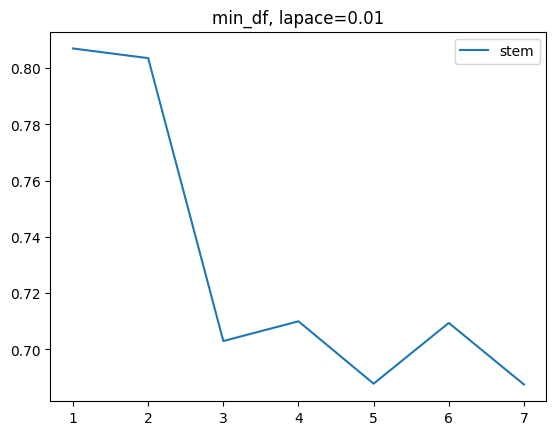

In [55]:
plt.plot([f'{i}' for i in range(1, 8)], stem_accuracy, label='stem')
# plt.plot([f'{i}' for i in range(1, 8)], [(stem_accuracy[j]+lem_accuracy[j]+token_accuracy[j])/3 for j in range(7)], label='avg')
plt.legend()
plt.title('min_df, lapace=0.01')
plt.show()
# plt.savefig('with laplace, min_df')

In [154]:
stem_accuracy = []
# lem_accuracy = []
# token_accuracy = []

for i in [0.01]:

  tf = TfidfVectorizer(min_df=2)
  stem_word_vector = tf.fit_transform(' '.join(text) for text in stem_amazon)
  # lem_word_vector = tf.fit_transform(' '.join(text) for text in lem_amazon)
  # token_word_vector = tf.fit_transform(' '.join(text) for text in amazon['Review'])

  # stem
  X_train, X_test, y_train, y_test = train_test_split(stem_word_vector, amazon['Cons_rating'].values, stratify=amazon['Cons_rating'], test_size=0.1)

  nb_classifier = MultinomialNB(alpha=i)
  nb_classifier.fit(X_train, y_train)

  y_pred = nb_classifier.predict(X_test)
  stem_accuracy.append(accuracy_score(y_test, y_pred))
  # # lemma
  # X_train, X_test, y_train, y_test = train_test_split(lem_word_vector, amazon['Cons_rating'].values, stratify=amazon['Cons_rating'], test_size=0.1)

  # nb_classifier = MultinomialNB(alpha=i)
  # nb_classifier.fit(X_train, y_train)

  # y_pred = nb_classifier.predict(X_test)
  # lem_accuracy.append(accuracy_score(y_test, y_pred))

  # # token
  # X_train, X_test, y_train, y_test = train_test_split(token_word_vector, amazon['Cons_rating'].values, stratify=amazon['Cons_rating'], test_size=0.1)

  # nb_classifier = MultinomialNB(alpha=i)
  # nb_classifier.fit(X_train, y_train)

  # y_pred = nb_classifier.predict(X_test)
  # token_accuracy.append(accuracy_score(y_test, y_pred))
  if i == 0.01:
    print(''.join(classification_report(y_test, y_pred)))
  print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.54      0.41      0.47       383
         2.0       0.32      0.13      0.18       332
         3.0       0.37      0.22      0.27       535
         4.0       0.36      0.18      0.24       827
         5.0       0.71      0.94      0.80      2836

    accuracy                           0.64      4913
   macro avg       0.46      0.38      0.39      4913
weighted avg       0.57      0.64      0.58      4913

0.6350498676979442


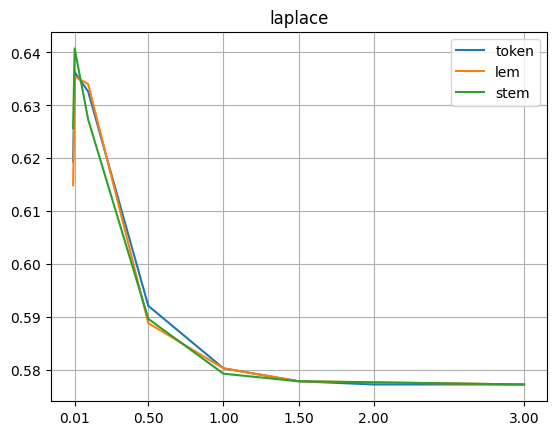

<Figure size 640x480 with 0 Axes>

In [21]:
plt.plot([0, 0.01, 0.1, 0.5, 1, 1.5, 2, 3], token_accuracy, label='token')
plt.plot([0, 0.01, 0.1, 0.5, 1, 1.5, 2, 3], lem_accuracy, label='lem')
plt.plot([0, 0.01, 0.1, 0.5, 1, 1.5, 2, 3], stem_accuracy, label='stem')
plt.xticks([0.01, 0.5, 1, 1.5, 2, 3])
plt.legend()
plt.grid(True)
plt.title('laplace')
plt.show()
plt.savefig('lapace with min_df = 1')
print('stem accuracy: ')


laplace는 감소할수록 예측값 감소
min_df는 증가할수록 예측값 증가
이상적인 laplace값은 0.01로 설정


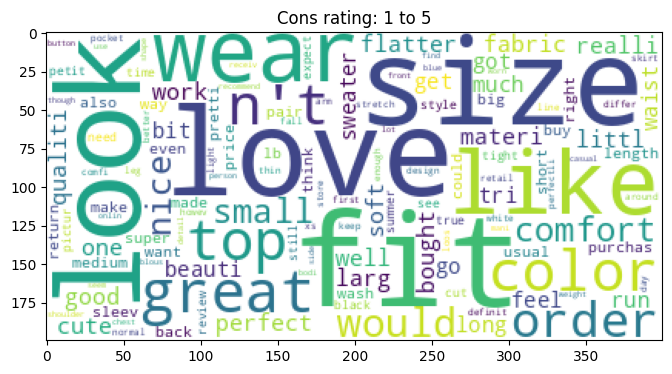

In [56]:
word_dict = dict()
for i in range(len(stem_amazon)):
  for j in range(len(stem_amazon[i])):
    if stem_amazon[i][j] in word_dict.keys():
      word_dict[stem_amazon[i][j]] += 1
    else:
      word_dict[stem_amazon[i][j]] = 1
wordcloud = WordCloud(relative_scaling = 0.2, background_color = 'white').generate_from_frequencies(word_dict)

plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.title('Cons rating: 1 to 5')
plt.axis('on')
plt.show()

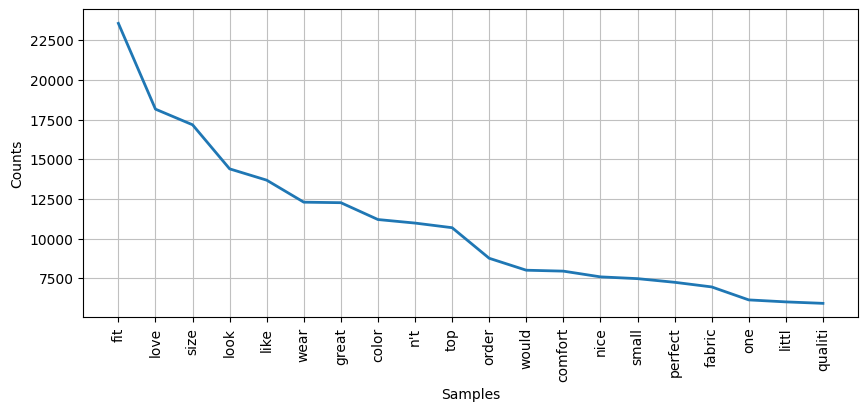

<Axes: xlabel='Samples', ylabel='Counts'>

In [169]:
plt.figure(figsize = (10,4))
frequency_one2five = nltk.Text([stem_amazon[i][j] for i in range(len(stem_amazon)) for j in range(len(stem_amazon[i]))], name="Cons_rating 1 to 5")
frequency_one2five.plot(20)

In [72]:
stem_amazon1 = [[] for _ in range(len(amazon['Review']))]
stem_amazon2 = [[] for _ in range(len(amazon['Review']))]
stem_amazon3 = [[] for _ in range(len(amazon['Review']))]
stem_amazon4 = [[] for _ in range(len(amazon['Review']))]
stem_amazon5 = [[] for _ in range(len(amazon['Review']))]
tmp = 0

for i in amazon.index:
  if amazon['Cons_rating'][i] == 1:
    for j in range(len(amazon['Review'][i])):
        stem_amazon1[tmp].append(porter_stemmer.stem(amazon['Review'][i][j]))
  tmp += 1

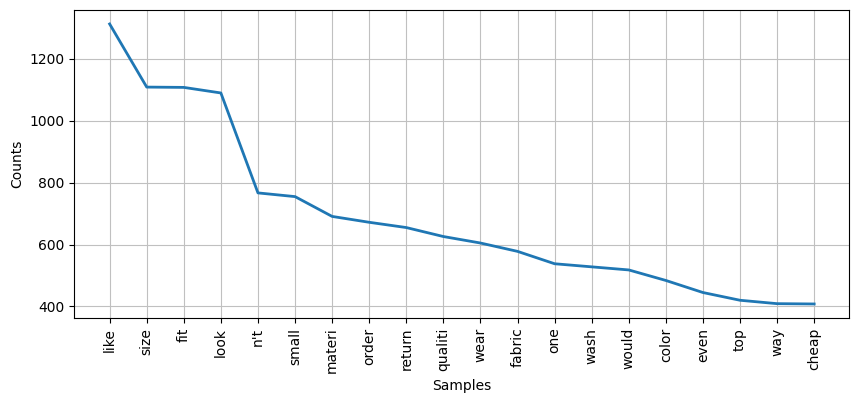

<Axes: xlabel='Samples', ylabel='Counts'>

In [91]:
plt.figure(figsize = (10,4))
frequency_one = nltk.Text([stem_amazon1[i][j] for i in range(len(stem_amazon1)) for j in range(len(stem_amazon1[i]))], name="Cons_rating 1")
frequency_one.plot(20)

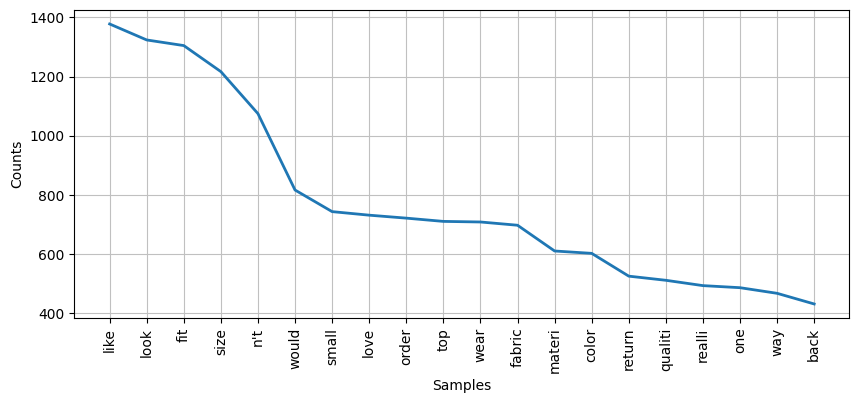

<Axes: xlabel='Samples', ylabel='Counts'>

In [92]:
stem_amazon2 = [[] for _ in range(len(amazon['Review']))]
tmp = 0

for i in amazon.index:
  if amazon['Cons_rating'][i] == 2:
    for j in range(len(amazon['Review'][i])):
        stem_amazon2[tmp].append(porter_stemmer.stem(amazon['Review'][i][j]))
  tmp += 1

plt.figure(figsize = (10,4))
frequency_two = nltk.Text([stem_amazon2[i][j] for i in range(len(stem_amazon2)) for j in range(len(stem_amazon2[i]))], name="Cons_rating 2")
frequency_two.plot(20)

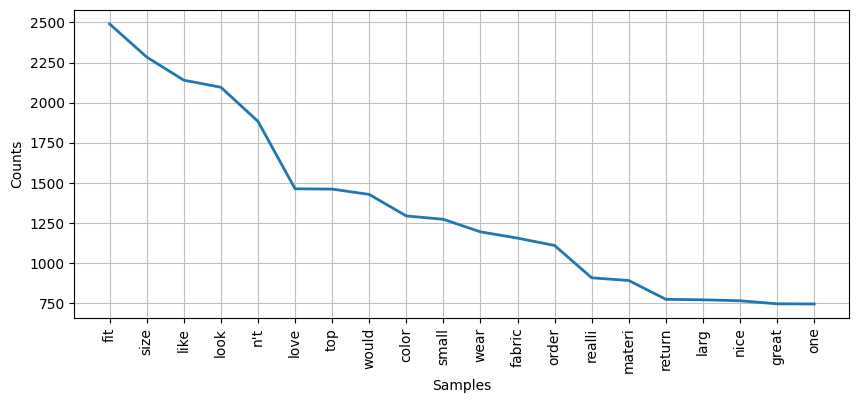

<Axes: xlabel='Samples', ylabel='Counts'>

In [93]:
stem_amazon3 = [[] for _ in range(len(amazon['Review']))]
tmp = 0

for i in amazon.index:
  if amazon['Cons_rating'][i] == 3:
    for j in range(len(amazon['Review'][i])):
        stem_amazon3[tmp].append(porter_stemmer.stem(amazon['Review'][i][j]))
  tmp += 1

plt.figure(figsize = (10,4))
frequency_three = nltk.Text([stem_amazon3[i][j] for i in range(len(stem_amazon3)) for j in range(len(stem_amazon3[i]))], name="Cons_rating 3")
frequency_three.plot(20)

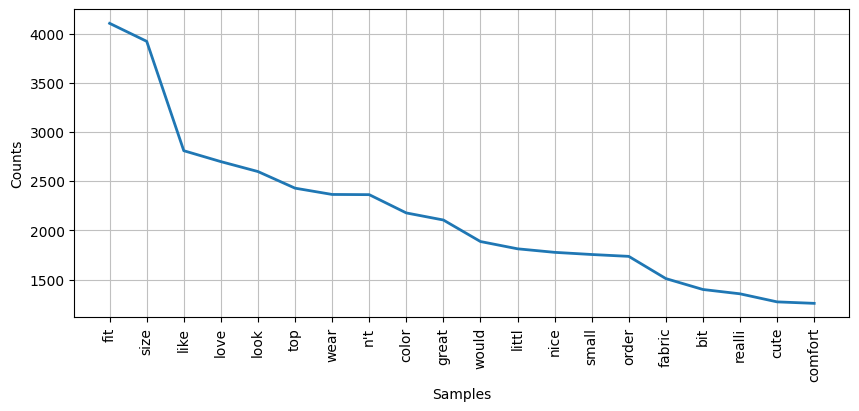

<Axes: xlabel='Samples', ylabel='Counts'>

In [94]:
stem_amazon4 = [[] for _ in range(len(amazon['Review']))]
tmp = 0

for i in amazon.index:
  if amazon['Cons_rating'][i] == 4:
    for j in range(len(amazon['Review'][i])):
        stem_amazon4[tmp].append(porter_stemmer.stem(amazon['Review'][i][j]))
  tmp += 1

plt.figure(figsize = (10,4))
frequency_four = nltk.Text([stem_amazon4[i][j] for i in range(len(stem_amazon4)) for j in range(len(stem_amazon4[i]))], name="Cons_rating 4")
frequency_four.plot(20)

In [102]:
stem_amazon5 = [[] for _ in range(len(amazon['Review']))]
tmp = 0

for i in amazon.index:
  if amazon['Cons_rating'][i] == 5:
    for j in range(len(amazon['Review'][i])):
        stem_amazon5[tmp].append(porter_stemmer.stem(amazon['Review'][i][j]))
  tmp += 1

plt.figure(figsize = (10,4))
frequency_five = nltk.Text([stem_amazon5[i][j] for i in range(len(stem_amazon5)) for j in range(len(stem_amazon5[i]))], name="Cons_rating 5")
frequency_five.plot(20)

76580

TypeError: ignored